#Loaning Mortgage Application Review

Purchasing property is no easy feat as there are many obstacles to tackle one of the biggest hurdles is the price. Scrounging up money to purchase property is not something everyone can do. So for those that aren't as fortunate they must get a loan from a bank. These people must send a Mortgage application to a loaner, which is usually a bank to get a loan. This data set contains 14 columns of information related to the Mortgage Application. These attributes are:

* dir - debt payments to total income ratio (https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html)

* hir - housing expenses to income ratio (https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html)

* lvr - ratio of size of loan to assessed value of property (https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html)

* ccs - consumers credit score from 1 to 6 "lowest value is best" (https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html)

* mcs - mortgage credit score from 1 to 4 (https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html)

* pbcr - public bad credit record (https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html)

* dmi - denied mortgage insurance (https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html)

* self - self employed (https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html)

* single - is the applicant single (https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html)

* uria - 1989 unemployment rate in the applicants industry , Massachusetts

* condominiom - is the unit a condo? (https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html)

* black - is the applicant black? (https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html)

* deny - mortgage application denied? (https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/Hdma.html)



##Exploratory Data Analysis + Data Preparation

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



df=pd.read_csv('https://raw.githubusercontent.com/Skyfallup/Summer-CSCI381-11/main/HDMA%20Boston%20Housing%20Data.txt', index_col = 0)

df.head()

,dir,hir,lvr,ccs,mcs,pbcr,dmi,self,single,uria,comdominiom,black,deny
1,0.221,0.221,0.800000,5,2,no,no,no,no,3.9,0,no,no
2,0.265,0.265,0.921875,2,2,no,no,no,yes,3.2,0,no,no
3,0.372,0.248,0.920398,1,2,no,no,no,no,3.2,0,no,no
4,0.320,0.250,0.860465,1,2,no,no,no,no,4.3,0,no,no
5,0.360,0.350,0.600000,1,1,no,no,no,no,3.2,0,no,no


In [35]:
#prints a list of number of unique values for each column
#this will allow us to understand our dataframe more
df.nunique()

dir            118
hir            112
lvr            220
ccs              6
mcs              4
pbcr             2
dmi              2
self             2
single           2
uria             9
comdominiom      2
black            2
deny             2
dtype: int64

We can see here by nunique we can see the number of options inside each column, from this data it looks about right.

In [36]:
#allows us to see the datatypes for each attribute
df.dtypes

dir            float64
hir            float64
lvr            float64
ccs              int64
mcs              int64
pbcr            object
dmi             object
self            object
single          object
uria           float64
comdominiom      int64
black           object
deny            object
dtype: object

This looks right, comdominiom could be categorical and be made an object if we wanted to. 1 for Yes 0 for No but as an int as long as we understand our data and know what the integers mean we should be fine.

In [37]:
#check for nulls
df.isnull().sum()

dir            0
hir            0
lvr            0
ccs            0
mcs            0
pbcr           0
dmi            0
self           0
single         0
uria           0
comdominiom    0
black          0
deny           0
dtype: int64

There are no nulls in our data set thankfully.

In [38]:
vals = df[['ccs', 'mcs', 'pbcr','dmi','self','single','uria','comdominiom','black','deny']].copy()
for x in range(len(vals.columns)):
    print(vals.columns[x] + ":")
    print(vals[vals.columns[x]].unique())
    print("")


ccs:
[5 2 1 6 3 4]

mcs:
[2 1 4 3]

pbcr:
['no' 'yes']

dmi:
['no' 'yes']

self:
['no' 'yes']

single:
['no' 'yes']

uria:
[ 3.9000001   3.20000005  4.30000019  1.79999995  3.0999999  10.60000038
  5.30000019  3.5999999   2.        ]

comdominiom:
[0 1]

black:
['no' 'yes']

deny:
['no' 'yes']



Displays what all the choices for selected columns of our data.

In [39]:
df.describe()

,dir,hir,lvr,ccs,mcs,uria,comdominiom
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,0.330167,0.262358,0.743629,2.023077,1.761538,3.752692,0.257692
std,0.063086,0.054502,0.188224,1.634405,0.501794,1.986312,0.438207
min,0.123800,0.080000,0.207143,1.000000,1.000000,1.800000,0.000000
25%,0.290000,0.230000,0.650000,1.000000,1.000000,3.100000,0.000000
50%,0.334950,0.270000,0.776541,1.000000,2.000000,3.200000,0.000000
75%,0.370000,0.300000,0.885424,2.000000,2.000000,3.900000,1.000000
max,0.730000,0.406000,1.908333,6.000000,4.000000,10.600000,1.000000


From what we can see the data makes sense nothing is out of line.

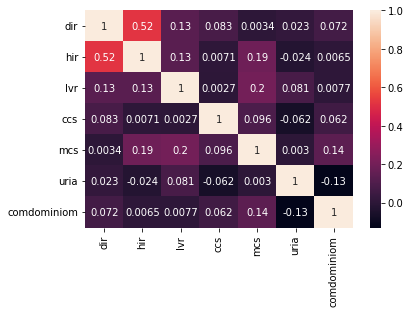

In [40]:
corr = df.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True)

From the heatmap we can see that hir and dir have a high correlation with each that is positive. As one goes up so does the other.

<Figure size 432x288 with 0 Axes>

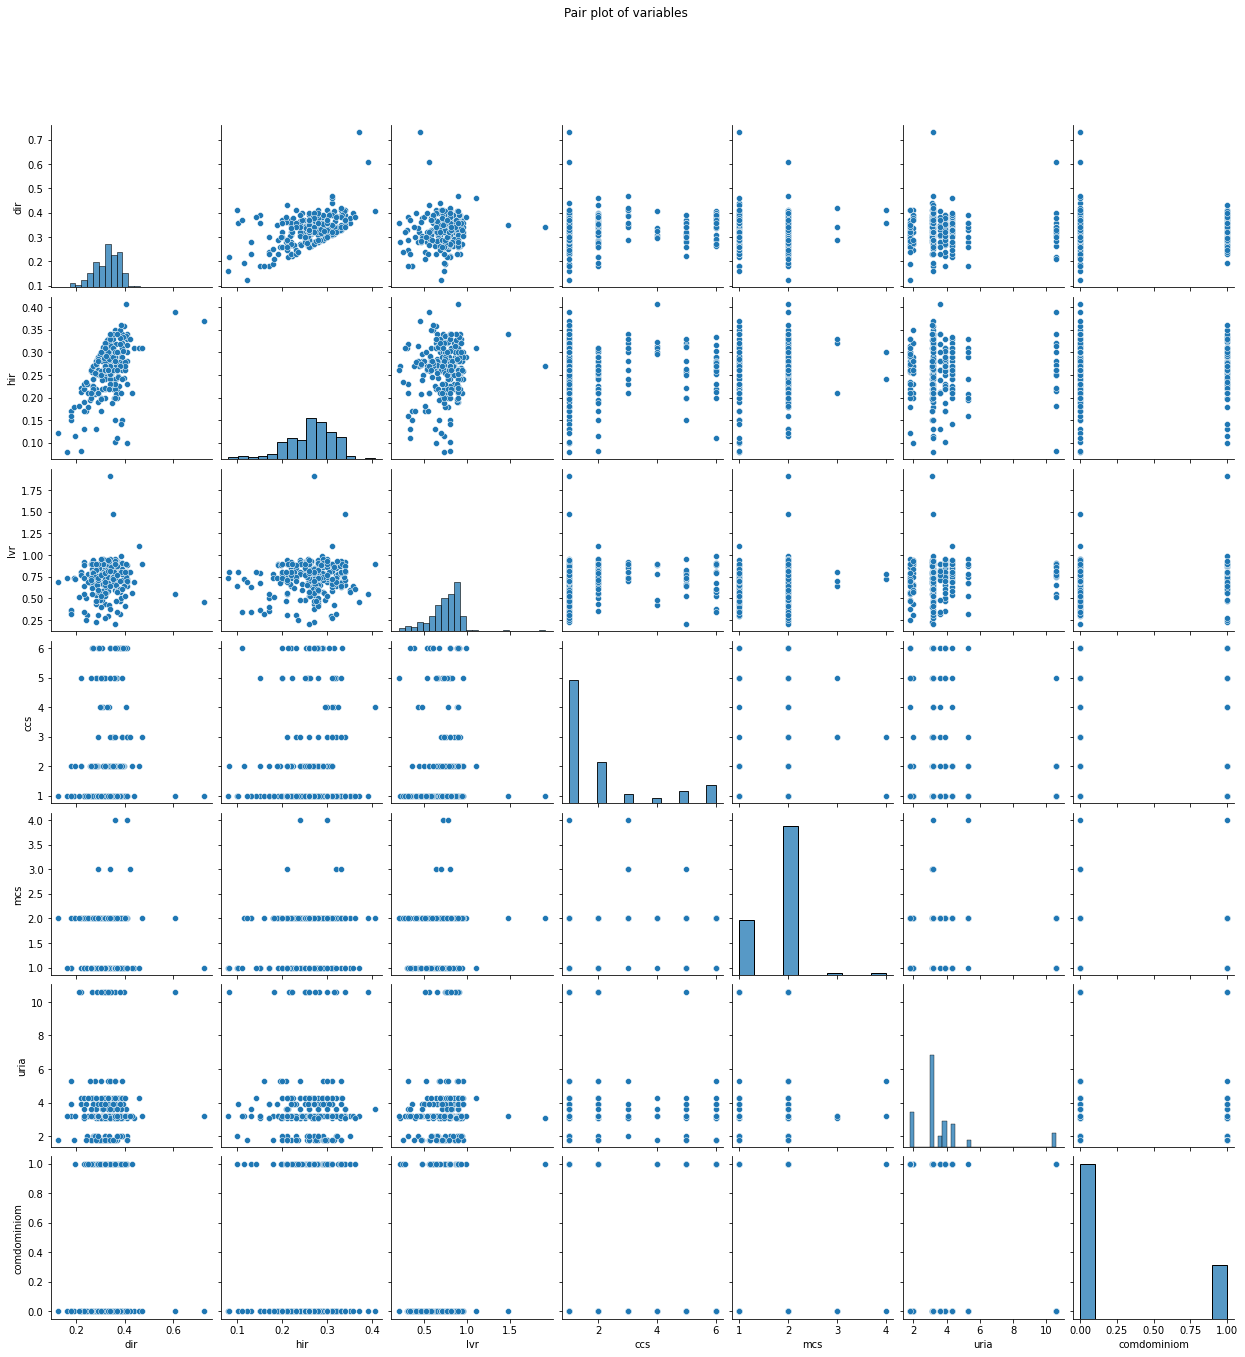

In [41]:
fig2=plt.figure()
g=sns.pairplot(df)
g.fig.suptitle("Pair plot of variables", y=1.08)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7dc1689d0>,
      dtype=object)

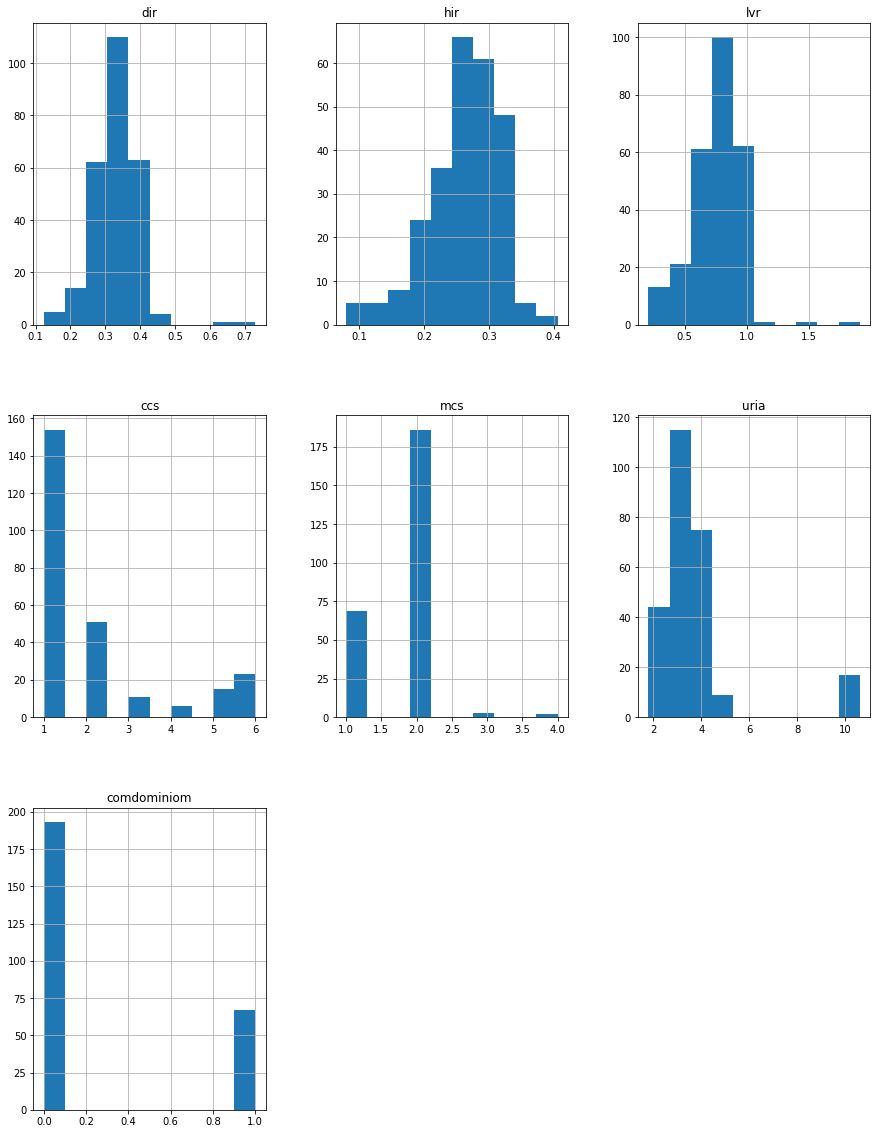

In [42]:
df.hist(figsize = (15,20))

From the histograms we can see that dir, hir, and lvr are normally distributed however the other 4 are not these being ccs, mcs, uria, and comdominiom.

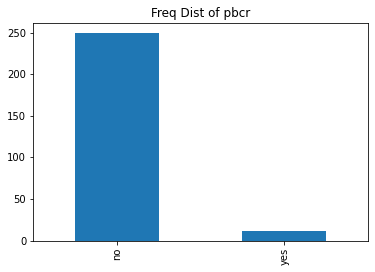

In [43]:
bplt = df['pbcr'].value_counts().plot.bar(title = "Freq Dist of pbcr")
bplt;

There are many people that do not have bad credit records.

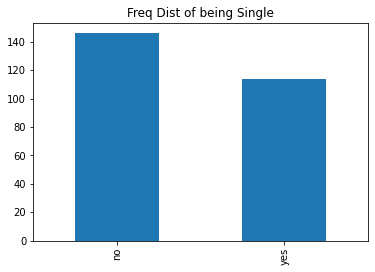

In [44]:
bplt = df['single'].value_counts().plot.bar(title = "Freq Dist of being Single")
bplt;

The amount of people that are single and those that are in a relationship are relatively close.

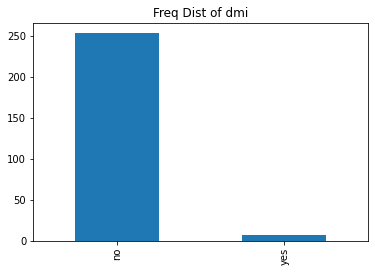

In [45]:
bplt = df['dmi'].value_counts().plot.bar(title = "Freq Dist of dmi")
bplt;

##Regression

In [46]:
#See the total amount of rows and columns
df.shape

(260, 13)

In [47]:
#see how many got denied and how many got accepted
df['deny'].value_counts()

no     230
yes     30
Name: deny, dtype: int64

From here we can see the majority of people did not get denied.

In [48]:
percentDenied = 30/260
percentAccepted = 230/260
print("Percent accepted: ",percentAccepted)
print("Percent denied: ", percentDenied)

Percent accepted:  0.8846153846153846
Percent denied:  0.11538461538461539


88% null error rate so this means we would need our score/accuracy to be higher than .88 

Out of all the people that submitted a Mortgage Application .88 got accepted and .12 got denied.

In [49]:
# dummy value is created for deny will give 1 if rejected 0 if not
df['deny'] = (df['deny'] == 'yes').astype(int) #did they get rejected if yes 1 if not 0
df['single'] = (df['single'] == 'yes').astype(int)#are they single 1 if yes 0 if no
df['pbcr'] = (df['pbcr'] == 'yes').astype(int)# do they have a bad public credit record 1 if yes 0 if no
df['dmi'] = (df['dmi'] == 'yes').astype(int)# if denied mortgage insurance return 1 else 0

In [58]:
#checking to make sure it worked
df['deny'].value_counts()

0    230
1     30
Name: deny, dtype: int64

In [51]:
selectedColumns = ['single', 'pbcr', 'dmi']
xDeny = df[selectedColumns].values
yDeny = df['deny'].values

xTest = df[selectedColumns].values

selectedColumns2 = ['dir','hir','lvr']
xDeny2 = df[selectedColumns2].values
yDeny2 = df['deny'].values
xDeny[:5]


array([[0, 0, 0],
       [1, 0, 0],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 0]])

We just print the first 5 as a check to make sure its working.

In [52]:
model = LogisticRegression()

model.fit(xDeny,yDeny)

LogisticRegression()

We instantiate a logistic reggression model and fit it with the x and y we set beforehand.

In [53]:
model.score(xDeny,yDeny)

0.9115384615384615

Our null rate was 88% and the accuracy score is 91%. Our model seems to be worht using judging by these two numbers.

In [54]:
print(selectedColumns)
model.coef_

['single', 'pbcr', 'dmi']


array([[-0.02229696,  1.31857769,  2.40671667]])

So from what we can get from this model above is that:

1. Being single could be good if you are looking for a loan. As an increase of being single results in a decrease chance of being denied on your mortgage application.

2. Having a public bad credit record could affect you negatively when it comes to getting your mortgage application approved. As bad credit record goes up so does your chances of getting denied.

3. Being denied on mortgage insurance has a higher chance than ur pbcr when it comes to getting denied. Compared to pbcr's 1.3, dmi is 2.4 so as denial on mortgage insurance goes up so does your chance of getting denied on your mortgage application.

In [55]:
model2 = LogisticRegression()

model2.fit(xDeny2,yDeny2)

LogisticRegression()

LogisticRegression for our 2nd model however this one is not that reliable as we'll see below

In [56]:
model2.score(xDeny2,yDeny2)

0.8846153846153846

The accuracy here is at 88% which is less than our first model making it worse than our first. It also is the same value as our null error rate so we should ignore this one.

In [57]:
yDeny = model.predict(xTest)
yDeny[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

This prediction tests "Will a customer get denied on their application". So in 10 trials the 9th trial would be a deny while everything else would be an accept.

From what we can see our first model performed well and is exactly what we wanted.

#Conclusion

In conclusion when building a model that questions whether an applicants mortgage application will get denied we can see many things are taken into account. Some more so than others. In our first model we test if being single, having a bad public record, and being denied mortgage insurance plays a role in getting your application denied. We can see that it does and the model we developed for it works exceptionally well. In our second model where we test ratios specificallly debt payment to total income, housing expenses to income, as well as the size of the loan to the assessed value of the property. We see that this model does not work as well as our first so we prefer the first. The first shows that it works better and is more affected by these columns when it comes to denial.